In [152]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from pathlib import Path
import requests
import pickle
import gzip
import matplotlib.pyplot as plt
import numpy as np 
import torch
import math
from torch.utils.data import TensorDataset, DataLoader

#Data loading step

DATA_PATH=Path("data")
PATH=DATA_PATH/"mnist"
PATH.mkdir(parents=True,exist_ok=True)
URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH/FILENAME).as_posix(),'rb') as f:
    ((x_train,y_train),(x_valid,y_valid),_)=pickle.load(f,encoding="latin-1")
   


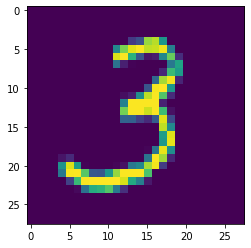

In [153]:
#Validate data loaded properly -- check random image
rand=np.random.randint(0,x_train.shape[0])
plt.imshow(x_train[rand].reshape(28,28))

#load data into tensors
x_train,y_train,x_valid,y_valid=map(torch.tensor,   (x_train,y_train,x_valid,y_valid))

In [154]:
class Mnist_Logistic(nn.Module):
    def __init__(self,lr=0.05):
        super().__init__()
        self.lin1=nn.Linear(784,10)
        self.loss=F.cross_entropy
        self.opt=optim.SGD(self.parameters(), lr=lr)
    def forward(self,xb):
        return self.lin1(xb)
    def accuracy(self, output,yb):
        preds=output.argmax(axis=1)
        return (preds==yb).float().mean()


In [157]:
train_data,valid_data=TensorDataset(x_train, y_train), TensorDataset(x_valid, y_valid)
bs=64
train_dl,valid_dl=DataLoader(train_data,batch_size=bs),DataLoader(valid_data,batch_size=bs)


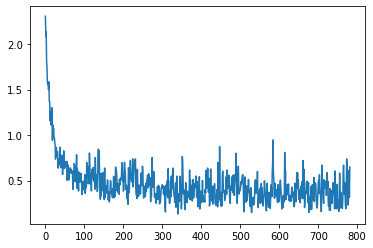

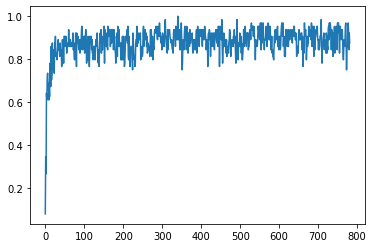

In [158]:
losses=[]
accuracies=[]
model=Mnist_Logistic(lr=.15)
for xb,yb in train_dl:
    preds=model(xb)
    loss=model.loss(preds,yb)
    loss.backward()
    model.opt.step()
    model.opt.zero_grad()
    losses.append(loss)
    acc=model.accuracy(preds,yb)
    accuracies.append(acc)
plt.plot(losses)
plt.show()
plt.plot(accuracies)
